<h1>
    Thermodynamics of Materials AD19: <br>
    <b>Homework 10</b>
</h1>

<table width="75%" align="center">
    <tr>
        <th align="left" colspan="2">
            <h2><b>Team<b>:</b></h2>
        </th>
    </tr>
    <tr>
        <td><h3>Antonio Osamu Katagiri Tanaka</h3></td>
        <td><h4>A01212611@itesm.mx</h4></td>
    </tr>
</table>

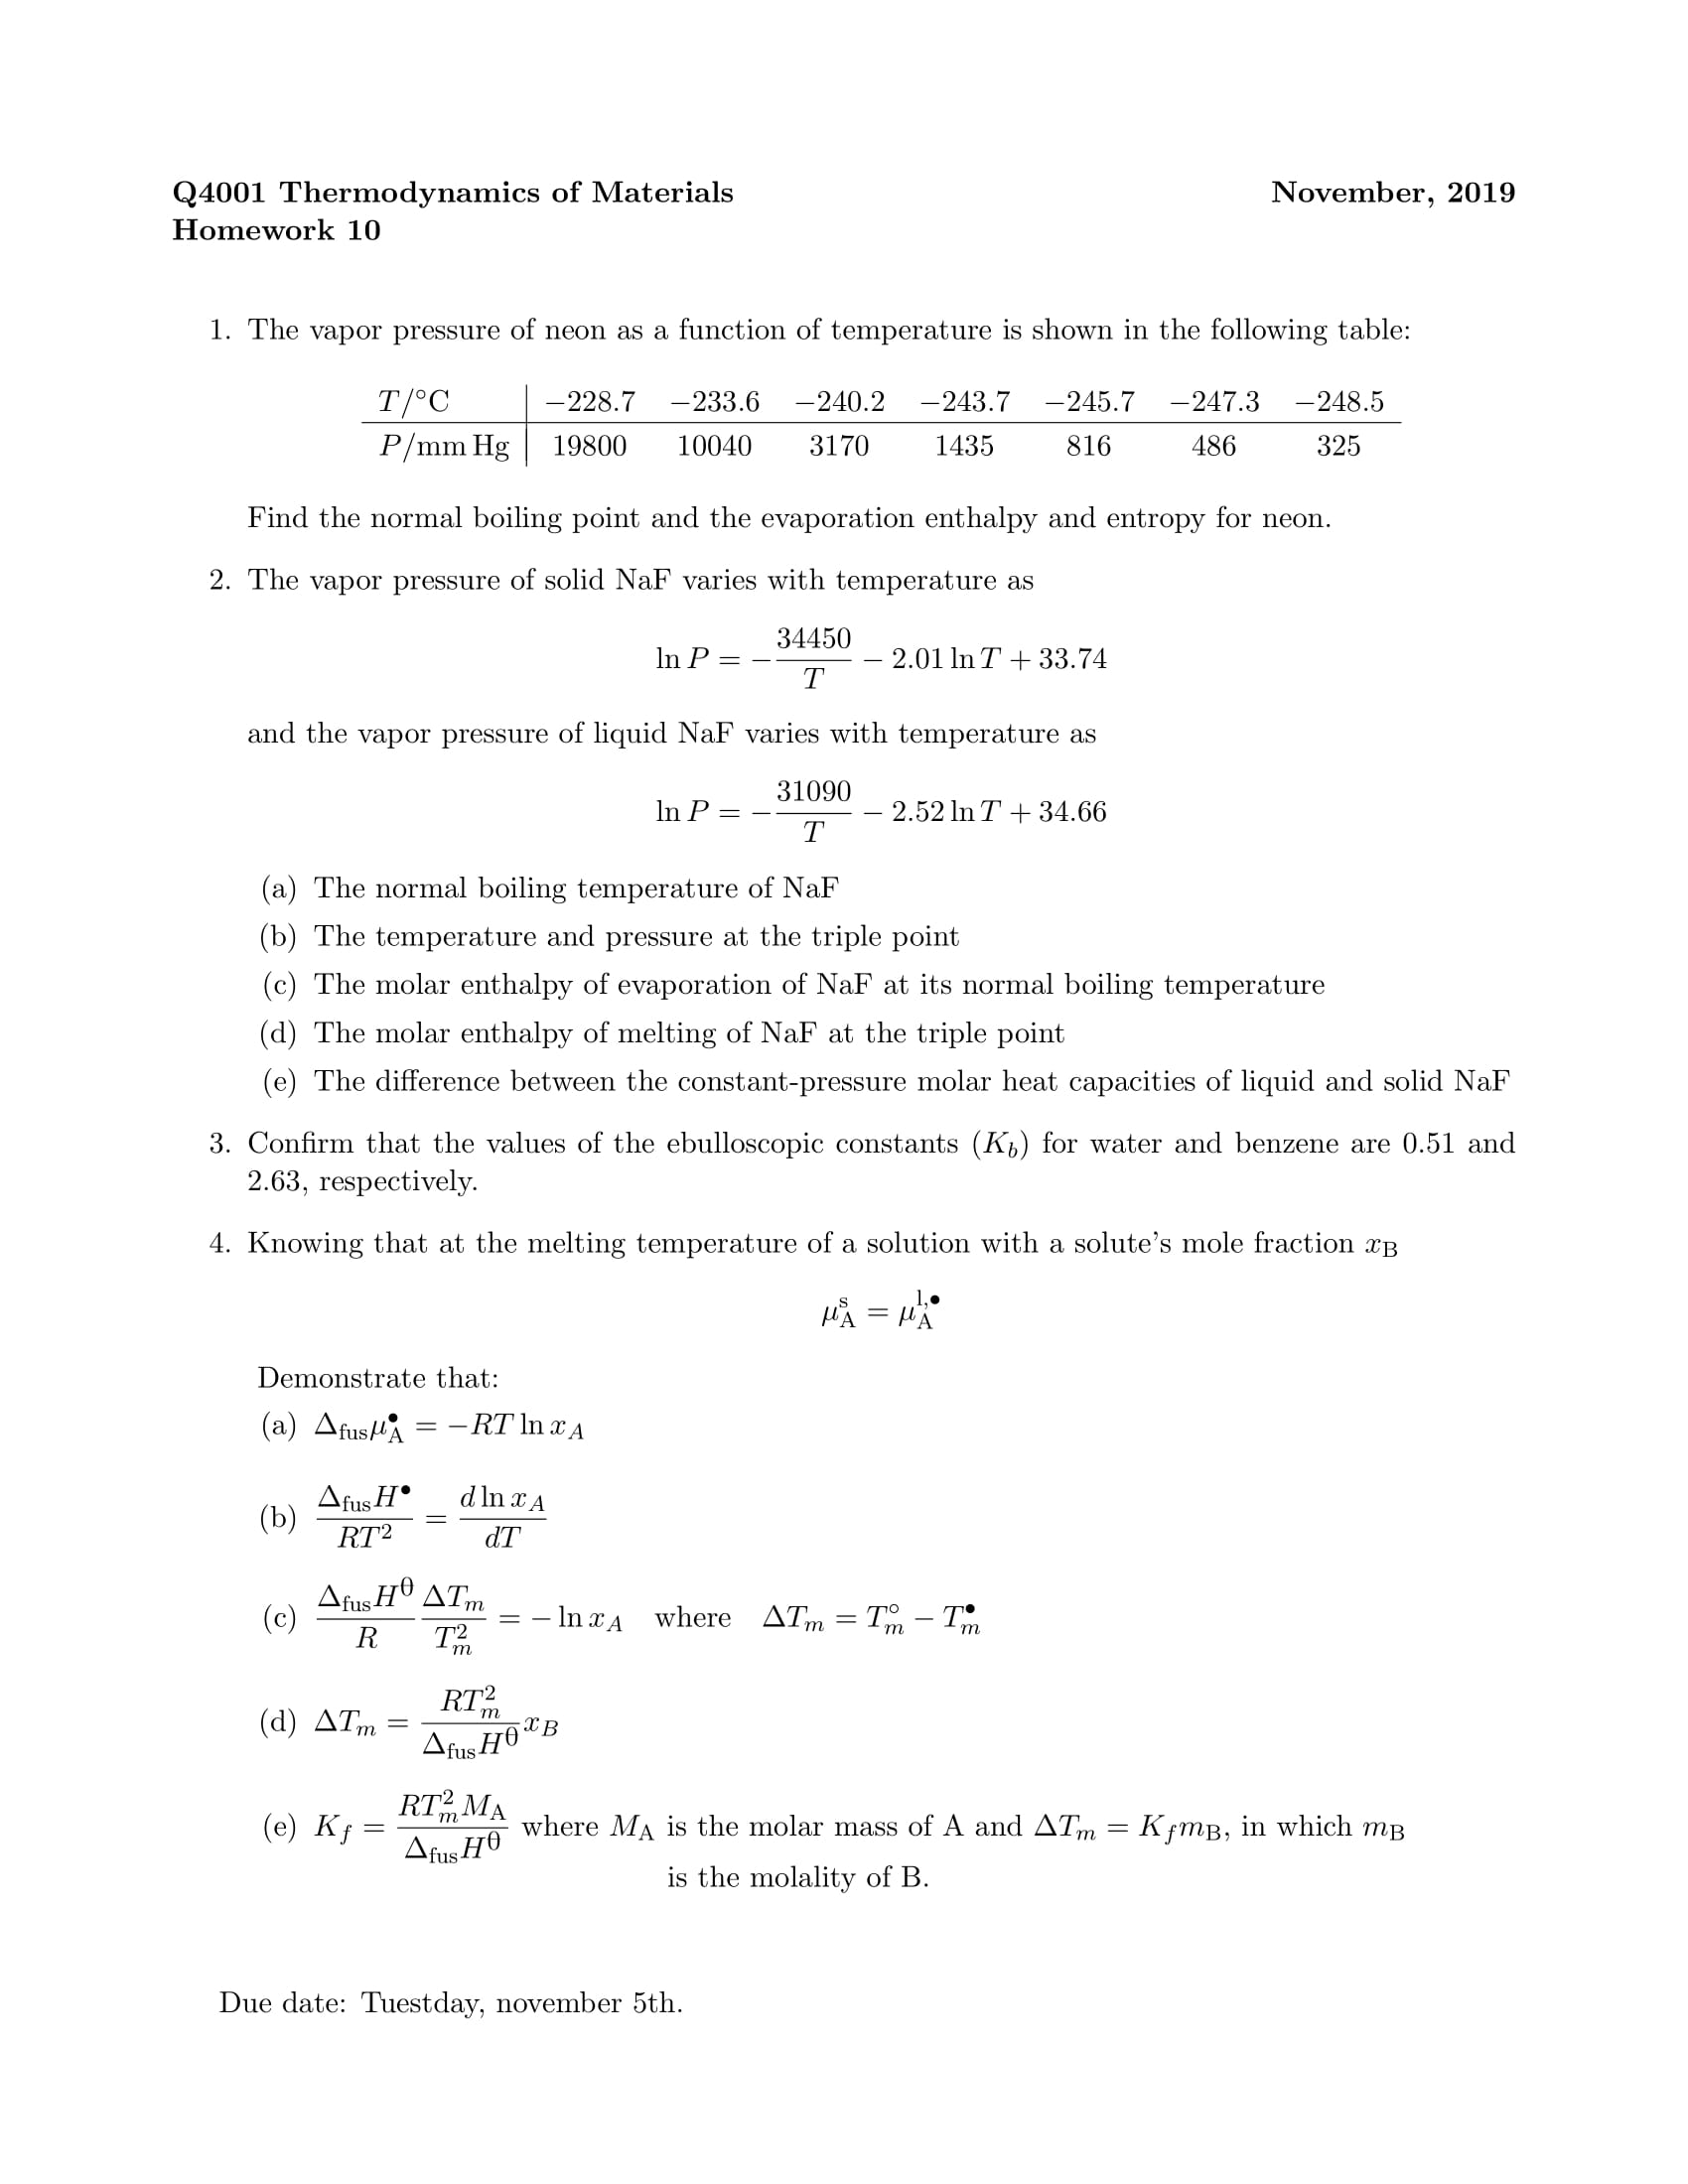

In [75]:
#******************************************************************************#
# Futures
%matplotlib inline
# from __future__ import unicode_literals
# from __future__ import print_function

# Generic/Built-in
import datetime
import argparse

import numpy as np
np.seterr(invalid='ignore')
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=15)     
plt.rc('ytick', labelsize=15)
import statsmodels.api as sm

from scipy import special, optimize
from IPython.display import display, Image
from statsmodels.stats.outliers_influence import summary_table
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
  
# Owned
pfont = {'fontname':'Consolas'};
# from nostalgia_util import log_utils
# from nostalgia_util import settings_util
__authors__   = ["Osamu Katagiri - A01212611@itesm.mx"]
__copyright__ = "None"
__credits__   = ["Marcelo Videa - mvidea@itesm.mx"]
__license__   = "None"
__status__    = "Under Work"
#******************************************************************************#
display(Image(filename='./directions/0.jpg'))

---
# Exercise 1

## normal boiling point

Temperature at which a liquid boils at $1 atm = 760 mmHg$.

Clausius-Clapeyron Equation

$$ ln\left(\frac{P_{vap,T_2}}{P_{vap,T_1}}\right) = -\frac{\Delta H_{vap}}{R} \left(\frac{1}{T_2} - \frac{1}{T_1}\right) $$

$$ T_2 = \frac{\Delta H_{vap} T_1}{\Delta H_{vap} - R T_1 ln\left(\frac{P_{vap,T_2}}{P_{vap,T_1}}\right)} $$

where: <br>
$P_{vap,T_1}$ - the vapor pressure of that substance at $T_1$ <br>
$P_{vap,T_2}$ - the vapor pressure of that substance at $T_2$ <br>
$\Delta H_{vap}$ - the enthalpy of vaporization <br>
$R$ - the gas constant

In [76]:
def T2_(P2, P1, T1, H):
    R = 8.31446261815324; #J/C mol
    #P1 = 325.0; #mmHg
    #T1 = -248.5; #C
    #H = 1.7326*1000; #J/mol

    nume = H*T1;
    deno = H - R*T1*np.log(P2/P1);
    return nume/deno;

# intialise data of lists. 
data = {'T':[-228.7, -233.6, -240.2, -243.7, -245.7, -247.3, -248.5],
        'P':[ 19800,  10040,   3170,   1435,    816,    486,    325]} 
  
# Create DataFrame 
df = pd.DataFrame(data)

display(df.T)

,0,1,2,3,4,5,6
T,-228.7,-233.6,-240.2,-243.7,-245.7,-247.3,-248.5
P,19800.0,10040.0,3170.0,1435.0,816.0,486.0,325.0


<module 'matplotlib.pyplot' from 'C:\\Users\\oskat\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

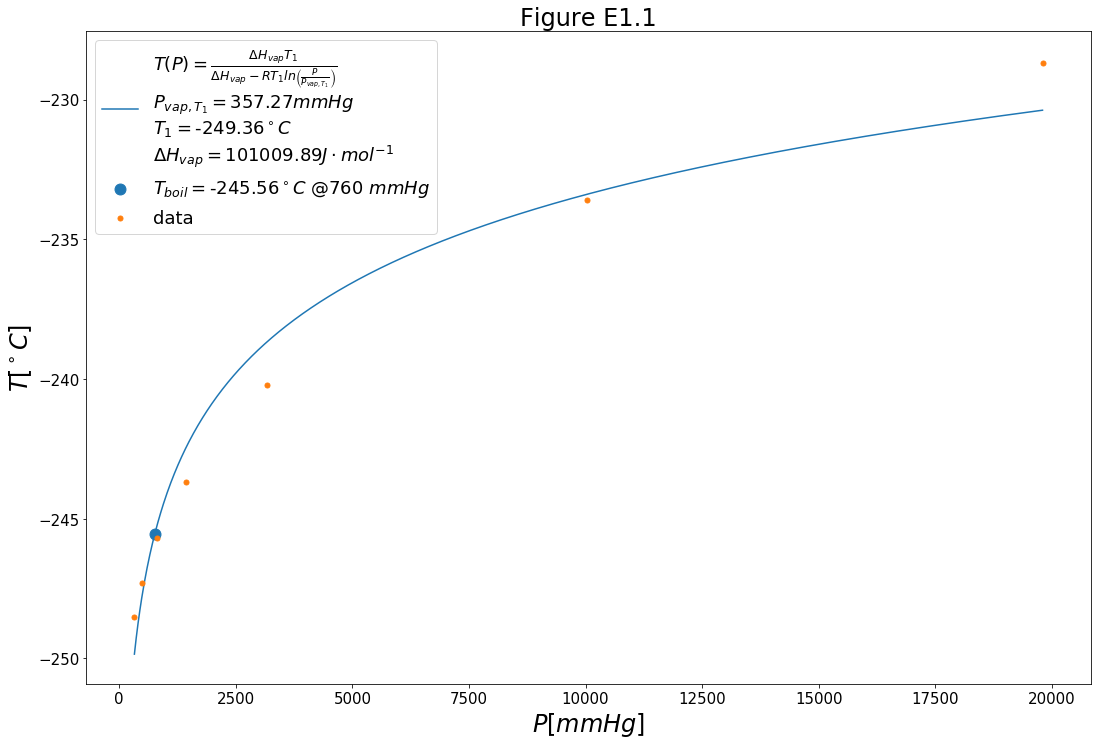

In [77]:
df = df.sort_values(by=['P']);
P  = df.iloc[:]['P'];
T  = df.iloc[:]['T'];
P = np.array(P);
T = np.array(T);

# constants
P2 = P;
P1 = 325.0; #mmHg
T1 = -248.5; #C
H = 1.7326*1000; #J/mol

# FIT the Clausius-Clapeyron Equation to the data
p0 = P1, T1, H
results = optimize.curve_fit(T2_, P, T, p0)
P1 = results[0][0];
T1 = results[0][1];
H  = results[0][2];
#print(results)

# PLOT
scale = 6;
plt.subplots(figsize=(3*scale, 2*scale));

# Plot
P2 = np.linspace(min(P), max(P), 1000)
T2 = T2_(P2, P1, T1, H)
plt.plot(P2, T2,
         label=r'$T(P) = \frac{\Delta H_{vap} T_1}{\Delta H_{vap} - R T_1 ln\left(\frac{P}{P_{vap,T_1}}\right)}$'
         + '\n' + r'$P_{vap,T_1}=$' + str(round(P1,2)) + r'$mmHg$'
         + '\n' + r'$T_1=$' + str(round(T1,2)) + r'$^\circ C$'
         + '\n' + r'$\Delta H_{vap}=$' + str(round(H,2)) + r'$J \cdot mol^{-1}$', zorder=0)
T_boil = T2_(760, P1, T1, H);
plt.scatter(760, T_boil, s=120, label=r'$T_{boil}=$' + str(round(T_boil,2)) + r'$^\circ C$' + ' @760 ' + r'$mmHg$', zorder=1);
plt.scatter(P, T, s=25, label='data', zorder=2);

# Display plots
plt.yscale('linear');
plt.xlabel(r'$P[mmHg]$', fontsize=24);
plt.ylabel(r'$T[^\circ C]$', fontsize=24);
plt.title('Figure E1.1', size=24);
plt.legend(prop={'size': 18});
display(plt);

## evaporation enthalpy

In [78]:
df = df.sort_values(by=['P']);
P  = df.iloc[:]['P'];
T  = df.iloc[:]['T'];

P = np.log(np.array(P));
T = 1/np.array(T);

From the Clausius-Clapeyron Equation

$$ ln\left(\frac{P_{vap,T_2}}{P_{vap,T_1}}\right) = -\frac{\Delta H_{vap}}{R} \left(\frac{1}{T_2} - \frac{1}{T_1}\right) $$

$$ \Delta H_{vap} = -\frac{(ln P_{vap,T_2} - ln P_{vap,T_1})}{\frac{1}{T_2} - \frac{1}{T_1}} R $$

In [83]:
df = df.sort_values(by=['P']);
P  = df.iloc[:]['P'];
T  = df.iloc[:]['T'];

y = np.log(np.array(P));
x = 1/np.array(T);

# Multivariate Linear Regression
# X is the independent variables (bivariate can be)
X = np.array([x])

# Y is the dependent data
Y = y

# generate a model of polynomial features
poly = PolynomialFeatures(degree=1)

# transform the x data for proper fitting (for single variable type it returns,[1,x,x**2])
X_ = poly.fit_transform(X)

# generate the regression object
clf = LinearRegression()

# perform the actual regression
clf = clf.fit(np.transpose(X), Y)

print('>>> INTERCEPT & COEFFICIENTS')
print(clf.intercept_)
print(clf.coef_)



>>> INTERCEPT & COEFFICIENTS
-40.747671950262706
[-11643.91282354]


In [73]:
slope = clf.coef_[0]; #the slope in Celsius
R = 8.31446261815324; #J/C mol
H_vap = -slope*R;
print('H_vap =', round(H_vap/1000,2), 'kJ/mol')

H_vap = 96.81 kJ/mol


---
# Exercise 2a

---
# Exercise 2b

---
# Exercise 2c

---
# Exercise 2d

---
# Exercise 2e

---
# Exercise 3

---
# Exercise 4a

---
# Exercise 4b

---
# Exercise 4c

---
# Exercise 4d

---
# Exercise 4e